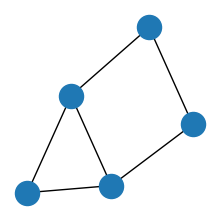

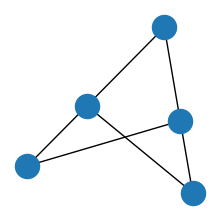

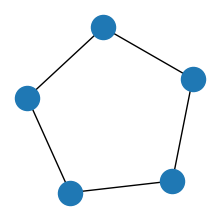

In [1]:
import torch
import torch_geometric
import networkx as nx
import matplotlib.pyplot as plt
from GOOD.utils.synthetic_data import synthetic_structsim

from torch_geometric.nn.conv import WLConv
from torch_geometric.utils import from_networkx

def plot_base(p):
    plt.figure(figsize=(2,2))
    nx.draw(p)
    plt.show()

house, _ = synthetic_structsim.house(start=0)
plot_base(house)

crane, _ = synthetic_structsim.crane(start=0)
plot_base(crane)

dircycle, _ = synthetic_structsim.dircycle(start=0)
plot_base(dircycle)

In [78]:
house_pyg = from_networkx(house)
house_pyg.x = torch.ones((house_pyg.num_nodes, 1), dtype=float)

crane_pyg = from_networkx(crane)
crane_pyg.x = torch.ones((crane_pyg.num_nodes, 1), dtype=float)

dircycle_pyg = from_networkx(dircycle)
dircycle_pyg.x = torch.ones((dircycle_pyg.num_nodes, 1), dtype=float)

wl = torch.nn.ModuleList([
    WLConv(),
    WLConv(),
    WLConv()
])

In [87]:
wl_histo = []
for motif in [house_pyg, crane_pyg, dircycle_pyg]:
    x = motif.x
    for l in wl:
        x = l(x, motif.edge_index)
    wl_histo.append(x)

In [88]:
for i in range(len(wl_histo)):
    s = wl[-1].histogram(wl_histo[i])
    print(s)

tensor([[1, 2, 2, 0, 0, 0]])
tensor([[0, 0, 0, 3, 2, 0]])
tensor([[0, 0, 0, 0, 0, 5]])


## NX WL

In [89]:
nx.set_node_attributes(house, values=1, name="x")
nx.set_node_attributes(crane, values=1, name="x")
nx.set_node_attributes(dircycle, values=1, name="x")

In [92]:
for motif in [house, crane, dircycle]:
    print(nx.weisfeiler_lehman_graph_hash(motif, node_attr="x", iterations=1))

b561895a2484800954b2ef8437f09332
b561895a2484800954b2ef8437f09332
2d27c459c1de6c3ce57c81455a79ca4d


In [93]:
for motif in [house, crane, dircycle]:
    print(nx.weisfeiler_lehman_graph_hash(motif, node_attr="x", iterations=2))

64f2aed418b0b4bae203fc7066f93952
cb5283970d13fab1c08f9e1ca44d5a43
f489c4fc289a55f1c50b55c09246f1eb


In [94]:
for motif in [house, crane, dircycle]:
    print(nx.weisfeiler_lehman_graph_hash(motif, node_attr="x", iterations=3))

eb2880f14bcce87cce3531651f709f7e
88b50428024d374d3680b6b749cf369e
348516c8be08a2d7fe72bf02f9b98c7e
